# 实时计算三相电功率

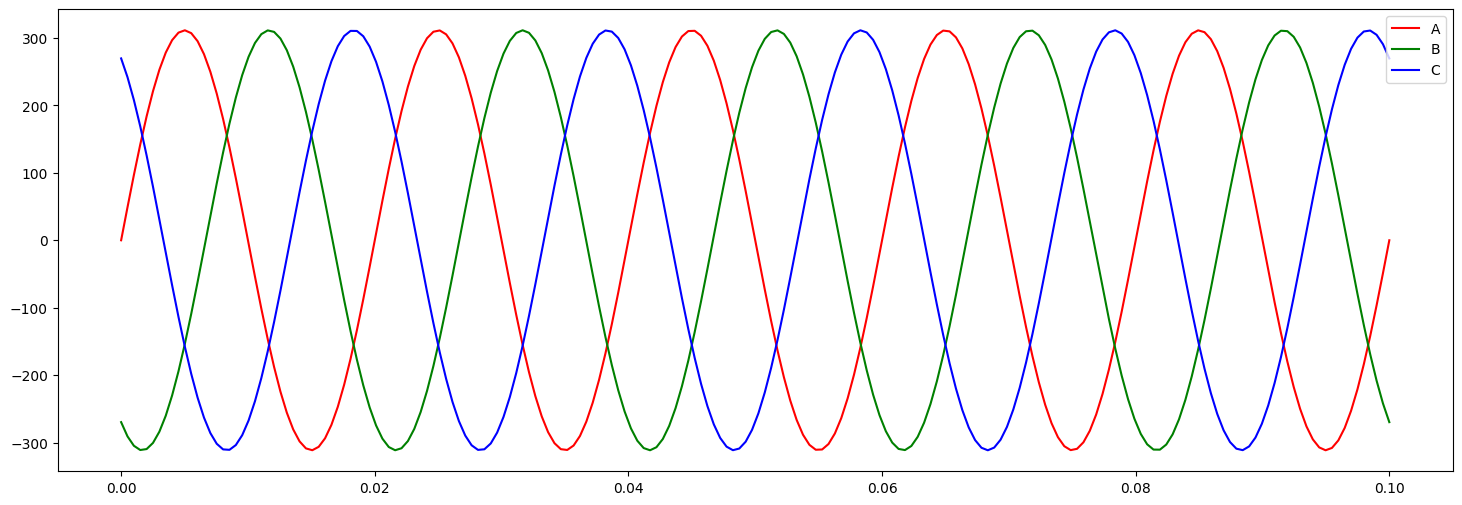

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
t1 = 0.1
nsamples = 200
t = np.linspace(t0, t1, nsamples)
dt = (t1-t0)/nsamples
f = 50     # 频率为50Hz
w = 2*np.pi*f

U = 220
Up = 220*np.sqrt(2)
AN = Up*np.sin(w*t)
BN = Up*np.sin(w*t-2/3*np.pi)
CN = Up*np.sin(w*t-4/3*np.pi)

fig = plt.figure(figsize= (18, 6))

ax = fig.add_subplot(1, 1, 1)
ax.plot(t, AN, 'r-', label='A')
ax.plot(t, BN, 'g-', label='B')
ax.plot(t, CN, 'b-', label='C')
plt.legend()
plt.show()

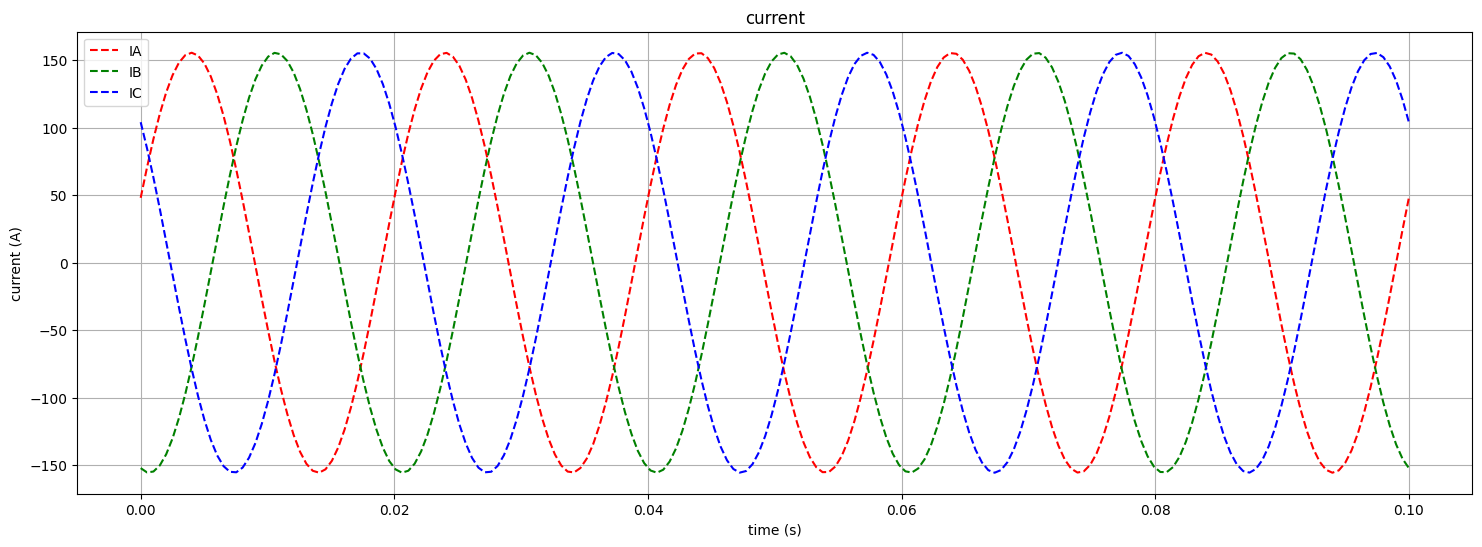

In [3]:
Ra = 2
Rb = 2
Rc = 2

dphi = 0.1*np.pi

IA = Up/Ra*np.sin(w*t + dphi)
IB = Up/Rb*np.sin(w*t-2/3*np.pi + dphi)
IC = Up/Rc*np.sin(w*t-4/3*np.pi + dphi)

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, IA, 'r--', label='IA')
ax.plot(t, IB, 'g--', label='IB') 
ax.plot(t, IC, 'b--', label='IC')
plt.legend()
plt.title('current')
plt.xlabel('time (s)')
plt.ylabel('current (A)')
plt.grid(True)
plt.show()


## 直接计算功率

$$
P = U_a * I_a + U_b * I_b + U_c * I_c
$$


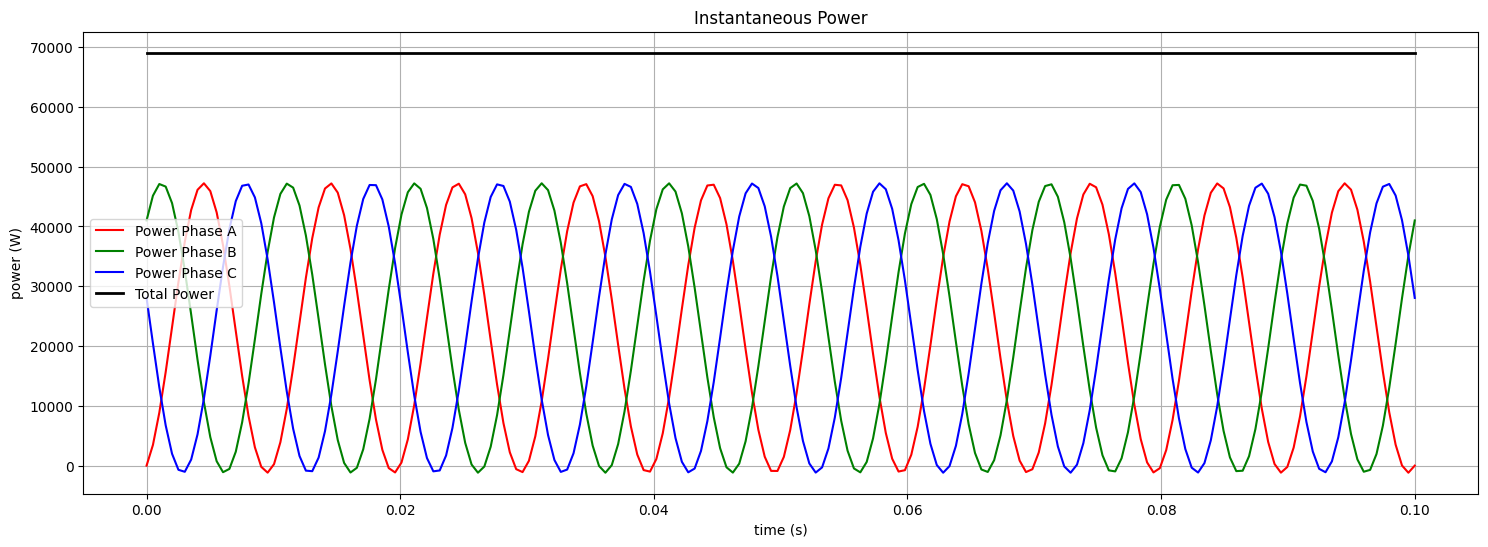

Average total power: 69046.70 W


In [4]:
# Calculate instantaneous power for each phase
Pa = AN * IA
Pb = BN * IB 
Pc = CN * IC

# Calculate total instantaneous power
P_total = Pa + Pb + Pc

# Plot individual phase powers
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, Pa, 'r-', label='Power Phase A')
ax.plot(t, Pb, 'g-', label='Power Phase B')
ax.plot(t, Pc, 'b-', label='Power Phase C')
ax.plot(t, P_total, 'k-', label='Total Power', linewidth=2)
plt.legend()
plt.title('Instantaneous Power')
plt.xlabel('time (s)')
plt.ylabel('power (W)')
plt.grid(True)
plt.show()

# Calculate average power
P_avg = np.mean(P_total)
print(f"Average total power: {P_avg:.2f} W")


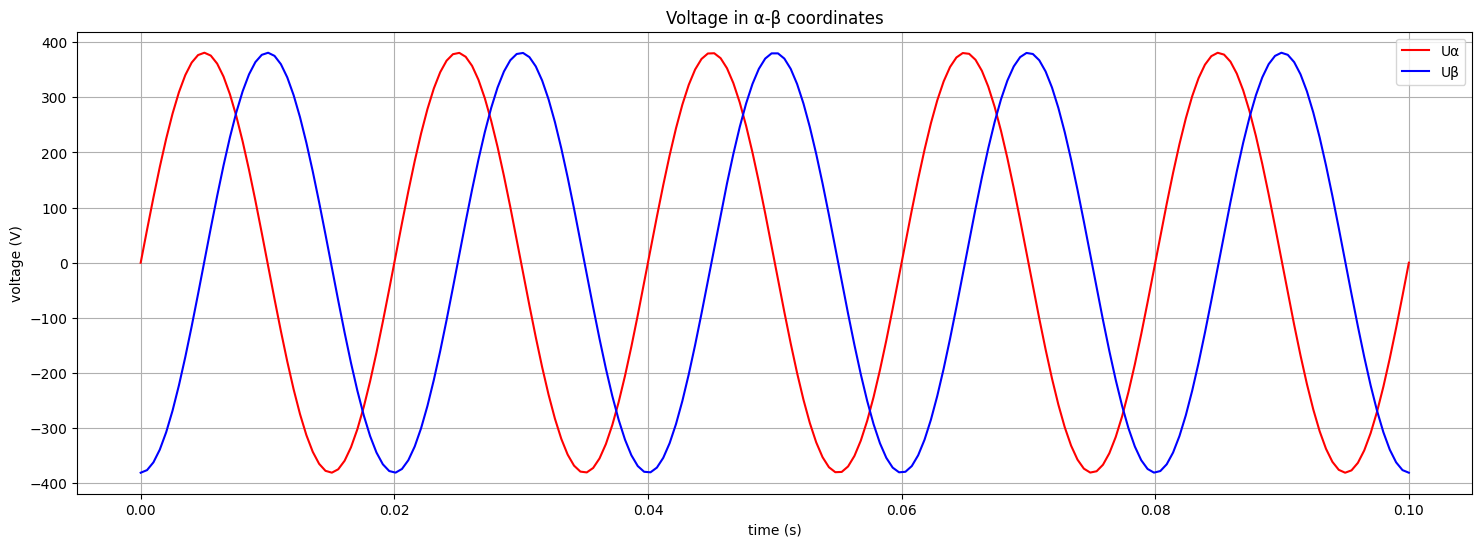

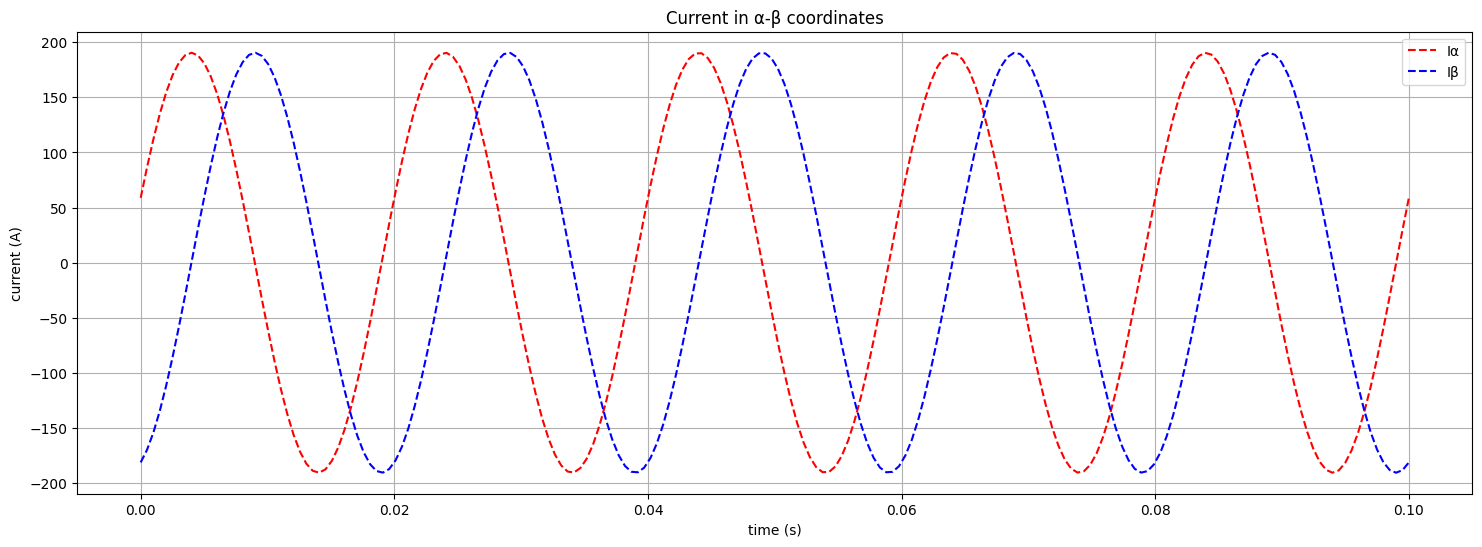

In [5]:
# Clark transformation for voltage (power invariant form)
clarke_matrix = np.sqrt(2/3) * np.array([[1, -0.5, -0.5],
                                        [0, np.sqrt(3)/2, -np.sqrt(3)/2]])

# Transform voltage using matrix multiplication
Ualpha, Ubeta = clarke_matrix @ np.vstack([AN, BN, CN])

# Transform current using the same matrix
Ialpha, Ibeta = clarke_matrix @ np.vstack([IA, IB, IC])

# Plot voltage in alpha-beta coordinates
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, Ualpha, 'r-', label='Uα')
ax.plot(t, Ubeta, 'b-', label='Uβ')
plt.legend()
plt.title('Voltage in α-β coordinates')
plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.grid(True)
plt.show()

# Plot current in alpha-beta coordinates
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, Ialpha, 'r--', label='Iα')
ax.plot(t, Ibeta, 'b--', label='Iβ')
plt.legend()
plt.title('Current in α-β coordinates')
plt.xlabel('time (s)')
plt.ylabel('current (A)')
plt.grid(True)
plt.show()


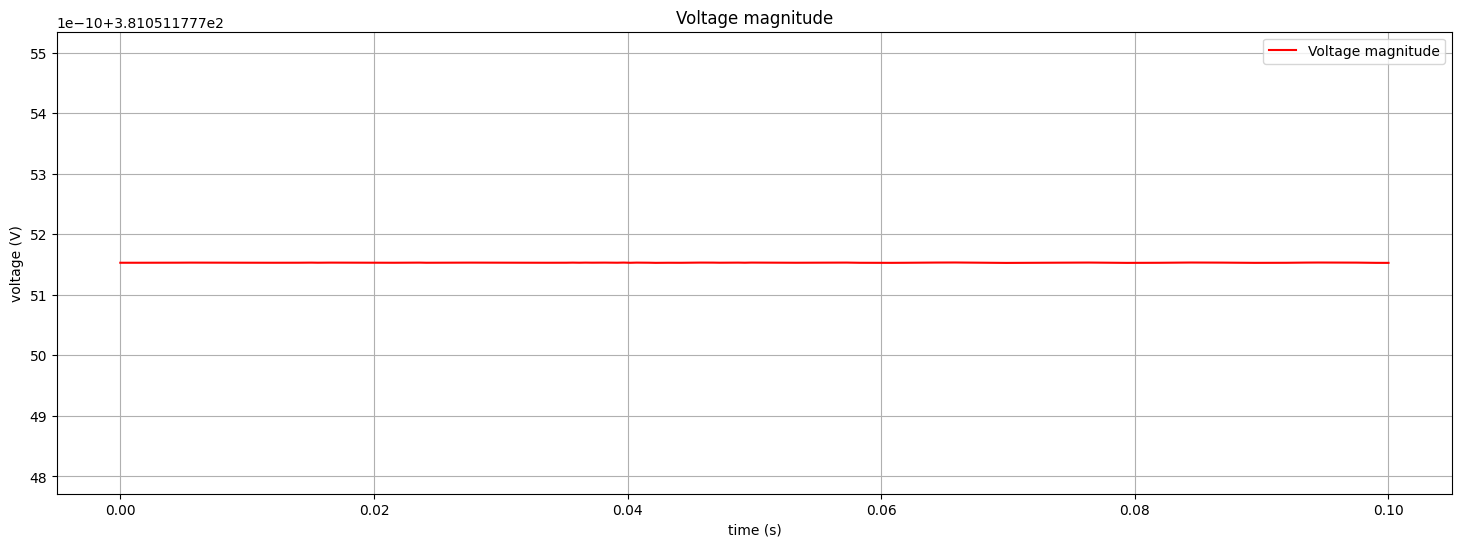

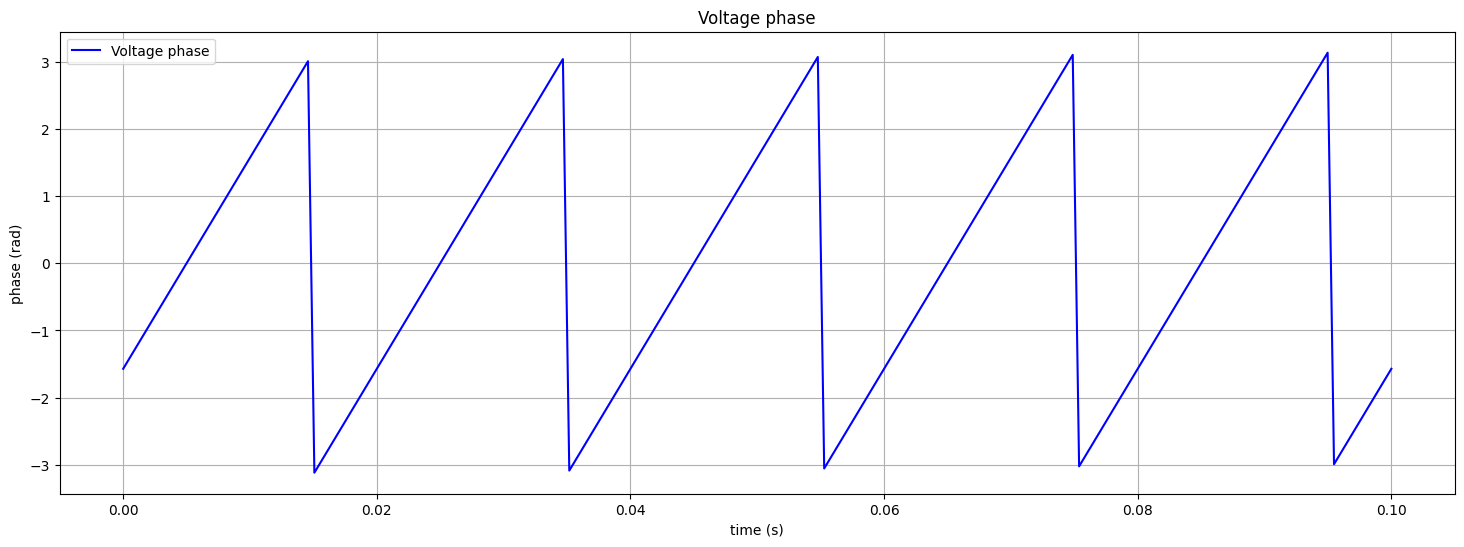

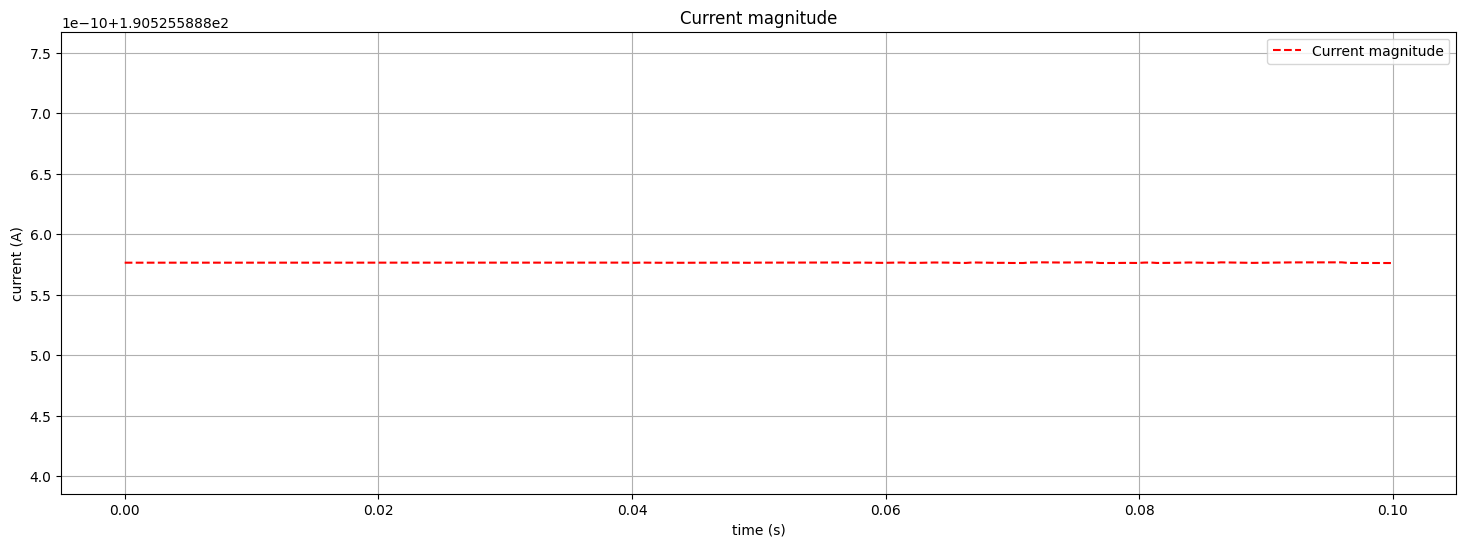

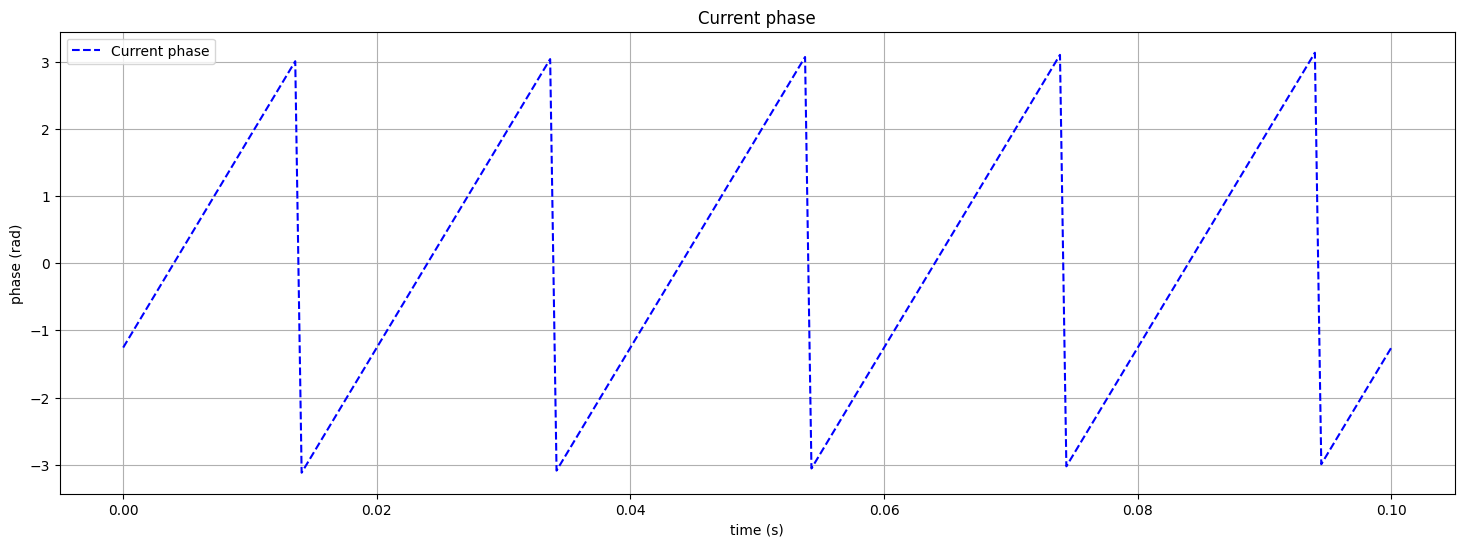

In [6]:
# Calculate magnitude and phase for voltage
U_magnitude = np.sqrt(Ualpha**2 + Ubeta**2)
U_phase = np.arctan2(Ubeta, Ualpha)

# Calculate magnitude and phase for current 
I_magnitude = np.sqrt(Ialpha**2 + Ibeta**2)
I_phase = np.arctan2(Ibeta, Ialpha)

# Plot voltage magnitude and phase
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, U_magnitude, 'r-', label='Voltage magnitude')
plt.legend()
plt.title('Voltage magnitude')
plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, U_phase, 'b-', label='Voltage phase')
plt.legend()
plt.title('Voltage phase')
plt.xlabel('time (s)')
plt.ylabel('phase (rad)')
plt.grid(True)
plt.show()

# Plot current magnitude and phase
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, I_magnitude, 'r--', label='Current magnitude')
plt.legend()
plt.title('Current magnitude')
plt.xlabel('time (s)')
plt.ylabel('current (A)')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, I_phase, 'b--', label='Current phase')
plt.legend()
plt.title('Current phase')
plt.xlabel('time (s)')
plt.ylabel('phase (rad)')
plt.grid(True)
plt.show()


In [13]:
# Create animation of voltage and current phasors in complex plane
import matplotlib.animation as animation
from IPython.display import HTML

# Create figure and axis for animation
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='polar')
plt.title('Voltage and Current Vectors', pad=30)  # Add padding to raise the title

# Initialize lines for voltage and current phasors
voltage_line, = ax.plot([], [], 'r-', label='Voltage', linewidth=2)
current_line, = ax.plot([], [], 'b--', label='Current', linewidth=2)
ax.legend()

# Set axis limits
ax.set_rlim(0, max(np.max(U_magnitude), np.max(I_magnitude))*1.2)

# Animation update function
def update(frame):
    # Update voltage phasor
    voltage_line.set_data([0, U_phase[frame]], [0, U_magnitude[frame]])
    # Update current phasor  
    current_line.set_data([0, I_phase[frame]], [0, I_magnitude[frame]])
    return voltage_line, current_line

# Create animation for first 1/5 of the data
frames = len(t) // 5  # Only use first 1/5 of frames
anim = animation.FuncAnimation(fig, update, frames=frames,
                             interval=50, blit=True)
plt.close(fig)
HTML(anim.to_jshtml())


## 用电压矢量乘以电流矢量来计算功率

$$
P = U * I
$$


Maximum power: 69046.70 W
Minimum power: 69046.70 W


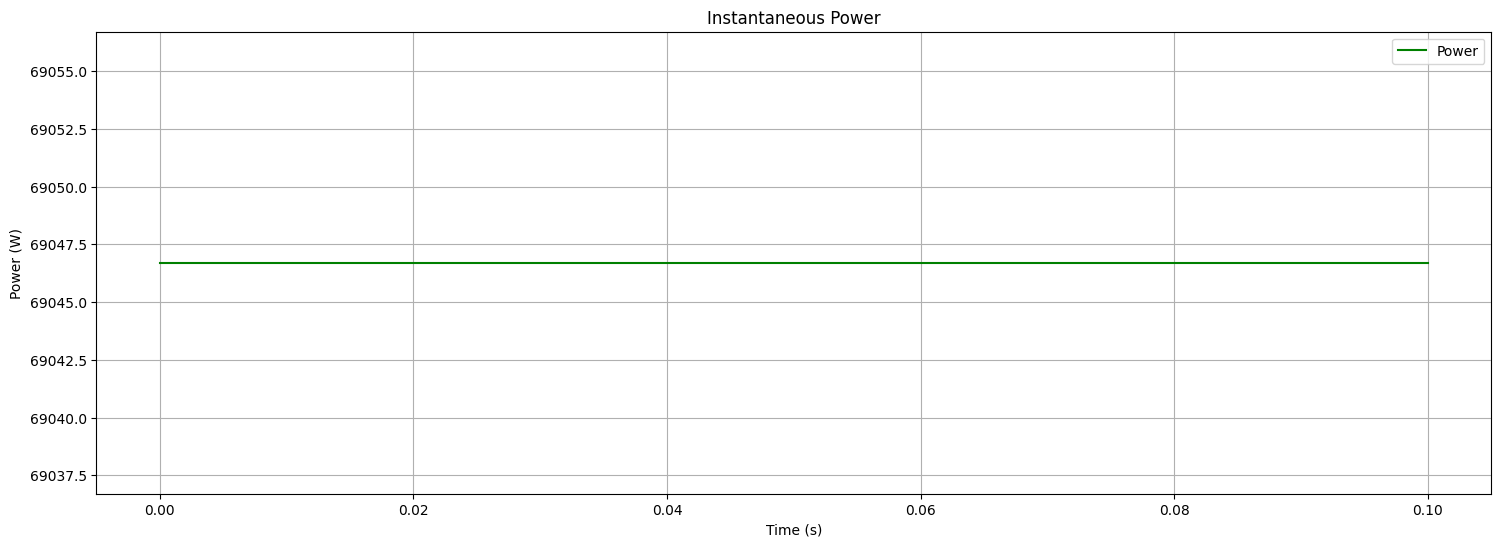

In [18]:
# Calculate power using voltage magnitude, current magnitude and phase difference
phase_diff = U_phase - I_phase  # Phase difference between voltage and current
power = U_magnitude * I_magnitude * np.cos(phase_diff)
# Print maximum and minimum power values
print(f"Maximum power: {np.max(power):.2f} W")
print(f"Minimum power: {np.min(power):.2f} W")

# Plot power over time
plt.figure(figsize=(18, 6))
plt.plot(t, power, 'g-', label='Power')
plt.title('Instantaneous Power')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.ylim(np.min(power) - 10, np.max(power) + 10)  # Set y-axis limits
plt.grid(True)
plt.legend()
plt.show()
